In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()

In [1]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
set_random_seed(42)

Using TensorFlow backend.


In [2]:
import os
comando = "PowerShell -Command \"Add-Type -AssemblyName System.Speech; (New-Object System.Speech.Synthesis.SpeechSynthesizer).Speak('trabajo terminado');\" "

In [3]:
m = 7
minimo = 13.2
maximo = 29

## Lectura de datos

In [4]:
matrizDiseño = pd.read_csv('MatDis/1_temperature_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/2_temperature_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/3_passengers_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/4_irradiance_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/5_irradiance_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/6_sunspots_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/7_distribution_subsampled_norm_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/8_active_power_Matrix.csv')
matrizDiseño.shape

(1524, 8)

## División y estandarización de datos

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, test_siz=0.3, val_size=0.2)

## Ruido (en las pruebas que sea necesario)

In [7]:
X_train_e, y_train_e = trainNoise('MatDis/1_temperature_All.csv',X_train.copy(), y_train.copy(), SNR_dB=35, NUMREP=3)
print(X_train.shape)
print(X_train_e.shape)

(852, 7)
(3408, 7)


## MLP

In [8]:
neuronas = [128,256, 512, 512, 256, 256]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m, 7e-4)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
________________________________________

## Entrenamiento

In [9]:
%%time
history = fitMLP(model, X_train_e, y_train_e, X_val, y_val, X_test, y_test, epoc=100, patien=-1)
os.system(comando)

Train on 11076 samples, validate on 214 samples
Epoch 1/100
11076/11076 [==============================] - 1s 116us/sample - loss: 0.0190 - mean_absolute_error: 0.0877 - mean_squared_error: 0.0160 - val_loss: 0.0150 - val_mean_absolute_error: 0.0895 - val_mean_squared_error: 0.0132
Epoch 2/100
11076/11076 [==============================] - 1s 79us/sample - loss: 0.0084 - mean_absolute_error: 0.0586 - mean_squared_error: 0.0067 - val_loss: 0.0056 - val_mean_absolute_error: 0.0486 - val_mean_squared_error: 0.0042
Epoch 3/100
11076/11076 [==============================] - 1s 80us/sample - loss: 0.0052 - mean_absolute_error: 0.0444 - mean_squared_error: 0.0040 - val_loss: 0.0047 - val_mean_absolute_error: 0.0457 - val_mean_squared_error: 0.0036
Epoch 4/100
11076/11076 [==============================] - 1s 78us/sample - loss: 0.0041 - mean_absolute_error: 0.0396 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0021
Epoch 5/100
110

Epoch 35/100
11076/11076 [==============================] - 1s 72us/sample - loss: 8.3655e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 4.5997e-04 - val_loss: 0.0013 - val_mean_absolute_error: 0.0183 - val_mean_squared_error: 9.5680e-04
Epoch 36/100
11076/11076 [==============================] - 1s 72us/sample - loss: 7.6053e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.9466e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 8.8642e-04
Epoch 37/100
11076/11076 [==============================] - 1s 72us/sample - loss: 8.2624e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 4.7089e-04 - val_loss: 0.0017 - val_mean_absolute_error: 0.0230 - val_mean_squared_error: 0.0013
Epoch 38/100
11076/11076 [==============================] - 1s 72us/sample - loss: 8.6779e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 5.0742e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 8.4541e-04
Epoch 39/100
110

458/458 [==============================] - 0s 26us/sample - loss: 0.0011 - mean_absolute_error: 0.0168 - mean_squared_error: 8.2823e-04
Test loss: 0.001133344233530171
Test mae: 0.016835641
Test mse: 0.00082822546
Wall time: 1min 32s


0

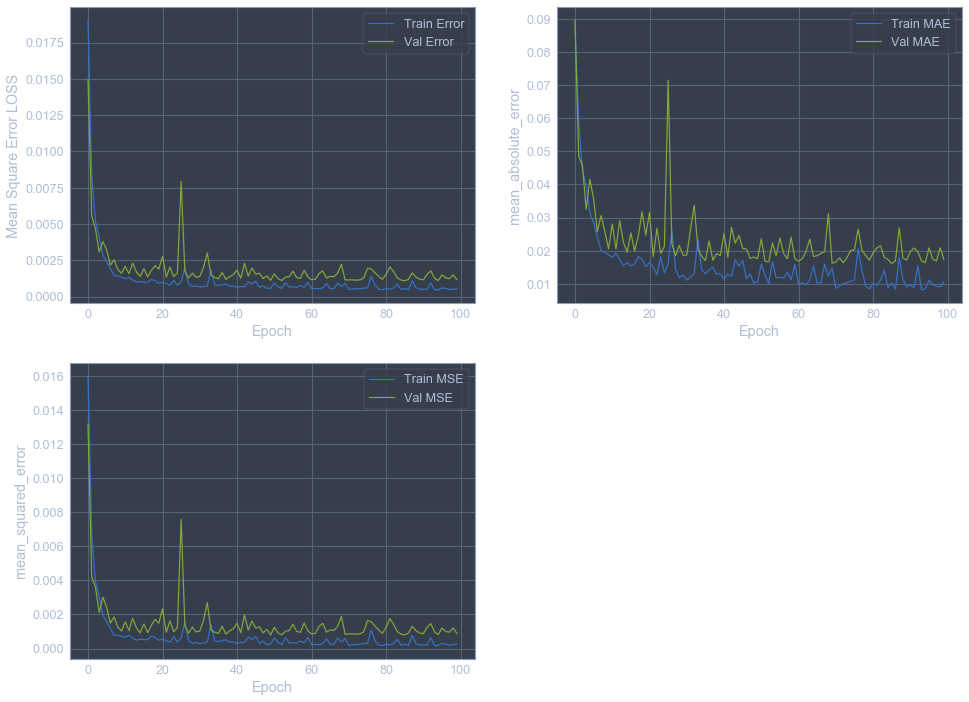

In [10]:
plotHistory(history)

## Predicción

In [11]:
y_predic= model.predict(X_test)

scaler = MinMaxScaler(feature_range=(minimo, maximo))
scaler.fit(y_test)

y_p = scaler.transform(y_predic)
y_t = scaler.transform(y_test)

In [12]:
print("SMAPE: ",sMAPE(y_t, y_p))
print("MAPE: ",mAPE(y_t, y_p))

SMAPE:  0.6723313944408762
MAPE:  1.3399540240064687


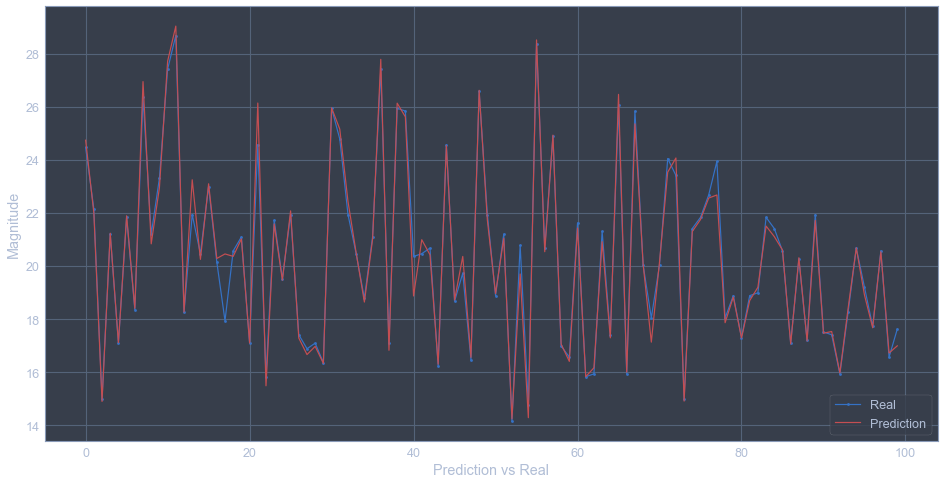

In [13]:
graphPrediction(y_t, y_p, samples=100)

In [14]:
model.save('modelo.h5')